# Main Modelling Notebook

In [11]:
import itertools as it
import matplotlib
import matplotlib.cm as cmx
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import numpy as np
import os.path as op
import pandas as pd
import re
import scipy as sp
import sklearn.preprocessing as Preprocessing
import datetime

from itertools import combinations
from sklearn.cross_validation import KFold as kfold
from sklearn.decomposition import TruncatedSVD as tSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression as Lin_Reg
from sklearn.linear_model import LogisticRegression as Log_Reg
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier as DTC
from scipy.io import mmread

%matplotlib inline
plt.style.use('ggplot') 
from IPython.display import display, HTML

#### Load Data

In [60]:
# load data
%run -i data_loading.py

248445
113036
Indexes computed

address_state object
annual_income float64
cpi float64
delinq_2_yrs int64
desc_len float64
dti float64
employ_length object
gdp float64
home_owner object
initial_list_status object
inquiry_6_mos int64
ipr float64
loan_amount int64
loan_purpose object
loan_term int64
months_since_last_record float64
open_accounts int64
revol_util float64
rir float64
total_accounts int64
unemploy float64
verif_status object
months_since_earliest_credit float64
emp_cleaned object
(Training set has 28182 rows)

address_state object
annual_income float64
cpi float64
delinq_2_yrs int64
desc_len float64
dti float64
employ_length object
gdp float64
home_owner object
initial_list_status object
inquiry_6_mos int64
ipr float64
loan_amount int64
loan_purpose object
loan_term int64
months_since_last_record float64
open_accounts int64
revol_util float64
rir float64
total_accounts int64
unemploy float64
verif_status object
months_since_earliest_credit float64
emp_cleaned object
(Test s

#### Set up Modelling Framework

In [61]:
# set up modelling framework
% run -i modelling_framework.py

#### Models without PCA

In [57]:
y.value_counts()

True     23897
False     4285
Name: loan_status, dtype: int64

In [58]:
y.mean()

0.84795259385423316

In [63]:
data_filtered.isnull().sum(axis=0)

address_state                        0
annual_income                        0
cpi                                  0
delinq_2_yrs                         0
desc_len                         57561
description                      57561
dti                                  0
earliest_credit                      0
employ_length                        0
employ_title                         0
gdp                                  0
home_owner                           0
id                                   0
initial_list_status                  0
inquiry_6_mos                        0
installment                          0
interest_rate                        0
ipr                                  0
issue_date                           0
loan_amount                          0
loan_purpose                         0
loan_status                          0
loan_subgrade                        0
loan_term                            0
months_since_last_record        103659
open_accounts            

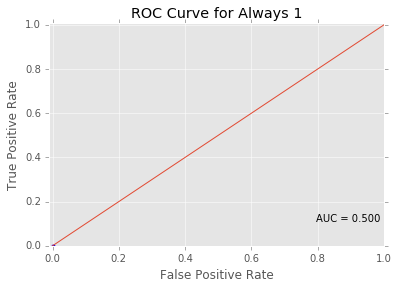

all   score: 0.152  baseline: 0.848   prec: 0.848   f1: 0.000  | test score 0.152  prec 0.848 f1 0.918  GP 1221MM
2011  score: 0.104  baseline: 0.896   prec: 0.896   f1: 0.000  | test score 0.107  prec 0.893
2012  score: 0.134  baseline: 0.866   prec: 0.866   f1: 0.000  | test score 0.135  prec 0.865
2013  score: 0.178  baseline: 0.822   prec: 0.822   f1: 0.000  | test score 0.176  prec 0.824


DummyClassifier(constant=0, random_state=None, strategy='constant')

In [64]:
eval_model_by_year(lambda: DummyClassifier(strategy='constant', constant=0), model_name='Always 1')

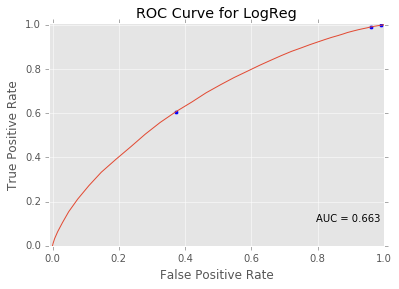

all   score: 0.847  baseline: 0.848   prec: 0.575   f1: 0.917  | test score 0.848  prec 0.538 f1 0.003  GP -910MM
2011  score: 0.894  baseline: 0.896   prec: 0.567   f1: 0.944  | test score 0.893  prec 0.727
2012  score: 0.866  baseline: 0.866   prec: nan   f1: 0.928  | test score 0.865  prec 0.758
2013  score: 0.821  baseline: 0.822   prec: 0.543   f1: 0.901  | test score 0.823  prec 0.532


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [65]:
eval_model_by_year(lambda: Log_Reg(), model_name='LogReg')

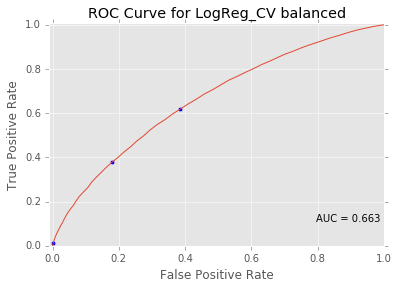

all   score: 0.623  baseline: 0.848   prec: 0.773   f1: 0.737  | test score 0.618  prec 0.776 f1 0.511  GP -35MM
2011  score: 0.631  baseline: 0.896   prec: 0.857   f1: 0.758  | test score 0.629  prec 0.847
2012  score: 0.608  baseline: 0.866   prec: 0.811   f1: 0.730  | test score 0.605  prec 0.818
2013  score: 0.635  baseline: 0.822   prec: 0.732   f1: 0.742  | test score 0.632  prec 0.739
C= 0.35938136638


cpi                                -1.199820
gdp                                 0.991461
emp_cleaned__policeofficer          0.865241
emp_cleaned__americanairlines      -0.710708
emp_cleaned__stateofcalifornia      0.707722
emp_cleaned__unitedairlines        -0.626640
emp_cleaned__unitedparcelservice   -0.608800
loan_purpose__small_business       -0.600452
emp_cleaned__sales                 -0.599574
emp_cleaned__                      -0.589513
address_state__AK                   0.579678
loan_purpose__renewable_energy     -0.579062
address_state__WY                   0.562865
emp_cleaned__salesmanager           0.530343
emp_cleaned__homedepot             -0.517910
loan_purpose__credit_card           0.513433
emp_cleaned__usgovernment          -0.513229
home_owner__RENT                   -0.483606
emp_cleaned__departmentofdefense    0.455809
emp_cleaned__projectmanager        -0.442427
emp_cleaned__officemanager         -0.433750
emp_cleaned__verizonwireless        0.424957
emp_cleane

In [66]:
logregcv_model = eval_model_by_year(lambda: Log_Reg_CV(class_weight='balanced'), model_name='LogReg_CV balanced')
print "C=", logregcv_model.C_[0]
lr_coeff = pd.DataFrame(logregcv_model.coef_.T, index=x_expanded.columns)
lr_coeff.columns = ['coeff']
lr_coeff['abs'] = lr_coeff.coeff.abs()
lr_coeff.sort_values('abs', ascending=False).coeff

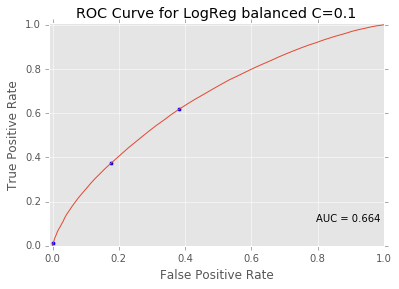

all   score: 0.623  baseline: 0.848   prec: 0.772   f1: 0.737  | test score 0.619  prec 0.776 f1 0.511  GP -35MM


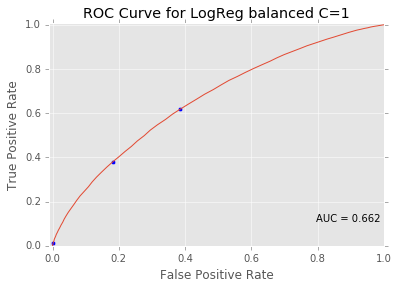

all   score: 0.623  baseline: 0.848   prec: 0.774   f1: 0.737  | test score 0.618  prec 0.776 f1 0.511  GP -35MM


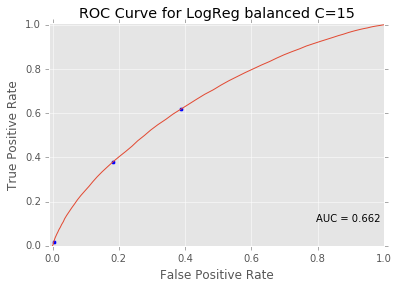

all   score: 0.623  baseline: 0.848   prec: 0.774   f1: 0.737  | test score 0.618  prec 0.777 f1 0.512  GP -34MM


In [67]:
for C in (0.1, 1, 15):
    eval_model_all_years(lambda: Log_Reg(class_weight='balanced', C=C), model_name='LogReg balanced C='+str(C))

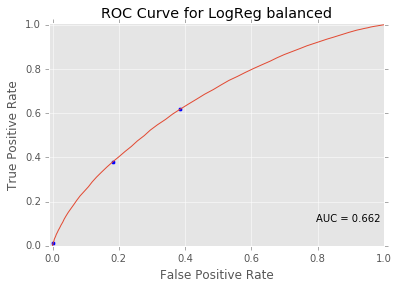

all   score: 0.623  baseline: 0.848   prec: 0.774   f1: 0.737  | test score 0.618  prec 0.776 f1 0.511  GP -35MM
2011  score: 0.631  baseline: 0.896   prec: 0.852   f1: 0.757  | test score 0.629  prec 0.847
2012  score: 0.607  baseline: 0.866   prec: 0.811   f1: 0.729  | test score 0.608  prec 0.816
2013  score: 0.633  baseline: 0.822   prec: 0.734   f1: 0.741  | test score 0.633  prec 0.739


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [68]:
eval_model_by_year(lambda: Log_Reg(class_weight='balanced'), model_name='LogReg balanced')

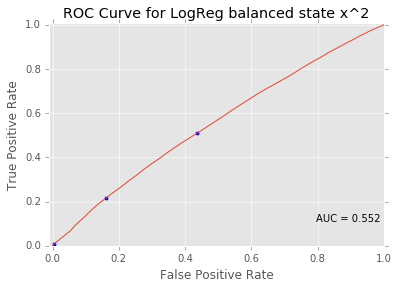

all   score: 0.518  baseline: 0.848   prec: 0.833   f1: 0.644  | test score 0.517  prec 0.830 f1 0.617  GP 108MM


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [69]:
eval_model_all_years(lambda: Log_Reg(class_weight='balanced'), 
                     poly_degree = 2,
                     columns = ['loan_amount', 'installment', 'home_owner', 'loan_purpose', 'address_state'],
                     model_name='LogReg balanced state x^2')

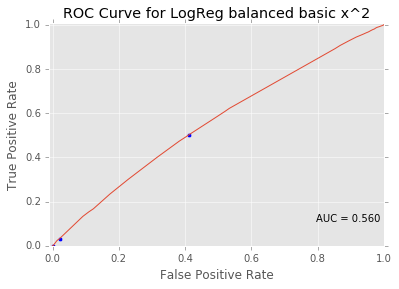

all   score: 0.523  baseline: 0.848   prec: 0.825   f1: 0.646  | test score 0.516  prec 0.825 f1 0.621  GP 98MM


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [70]:
eval_model_all_years(lambda: Log_Reg(class_weight='balanced'), 
                     poly_degree = 2,
                     columns = ['loan_amount', 'installment', 'home_owner', 'loan_purpose'],
                     model_name='LogReg balanced basic x^2')

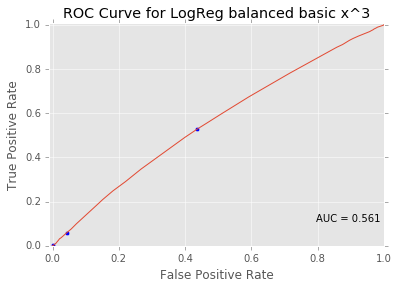

all   score: 0.533  baseline: 0.848   prec: 0.824   f1: 0.657  | test score 0.533  prec 0.824 f1 0.600  GP 71MM


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [71]:
eval_model_all_years(lambda: Log_Reg(class_weight='balanced'), 
                     poly_degree = 3,
                     columns = ['loan_amount', 'installment', 'home_owner', 'loan_purpose'],
                     model_name='LogReg balanced basic x^3')

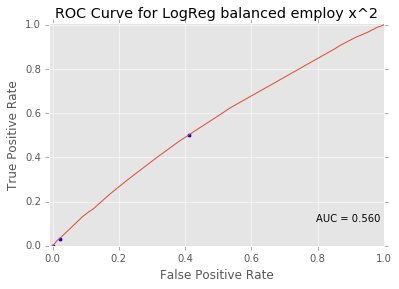

all   score: 0.523  baseline: 0.848   prec: 0.825   f1: 0.646  | test score 0.516  prec 0.825 f1 0.621  GP 98MM


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [72]:
eval_model_all_years(lambda: Log_Reg(class_weight='balanced'), 
                     poly_degree = 2,
                     columns = ['loan_amount', 'installment', 'home_owner', 'loan_purpose', 'employ_title'],
                     model_name='LogReg balanced employ x^2')

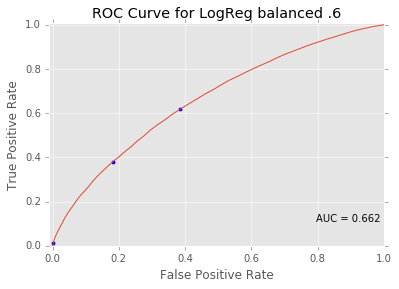

all   score: 0.623  baseline: 0.848   prec: 0.724   f1: 0.737  | test score 0.618  prec 0.733 f1 0.290  GP -469MM
2011  score: 0.631  baseline: 0.896   prec: 0.835   f1: 0.757  | test score 0.629  prec 0.818
2012  score: 0.607  baseline: 0.866   prec: 0.785   f1: 0.729  | test score 0.608  prec 0.794
2013  score: 0.633  baseline: 0.822   prec: 0.682   f1: 0.741  | test score 0.633  prec 0.696


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [73]:
eval_model_by_year(lambda: Log_Reg(class_weight='balanced'), prob_threshold=.6, model_name='LogReg balanced .6')

C:\Users\agreene\AppData\Local\Continuum\Anaconda2\envs\amg1\lib\site-packages\sklearn\discriminant_analysis.py:688: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


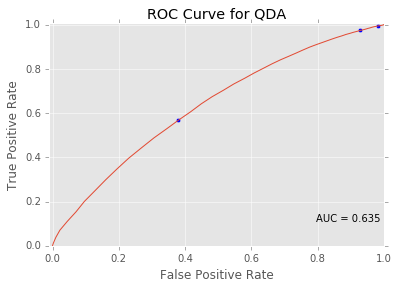

all   score: 0.846  baseline: 0.848   prec: 0.646   f1: 0.916  | test score 0.847  prec 0.615 f1 0.010  GP -895MM
2011  score: 0.896  baseline: 0.896   prec: nan   f1: 0.945  | test score 0.893  prec nan
2012  score: 0.866  baseline: 0.866   prec: nan   f1: 0.928  | test score 0.865  prec 0.000
2013  score: 0.818  baseline: 0.822   prec: 0.630   f1: 0.899  | test score 0.820  prec 0.638


QuadraticDiscriminantAnalysis(priors=None, reg_param=1,
               store_covariances=False, tol=0.0001)

In [74]:
eval_model_by_year(lambda: QDA(reg_param = 1), model_name='QDA')

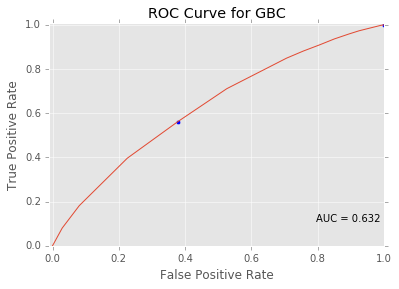

all   score: 0.848  baseline: 0.848   prec: nan   f1: 0.918  | test score 0.848  prec nan f1 0.000  GP -915MM
2011  score: 0.896  baseline: 0.896   prec: nan   f1: 0.945  | test score 0.893  prec 0.800
2012  score: 0.866  baseline: 0.866   prec: nan   f1: 0.928  | test score 0.865  prec nan
2013  score: 0.822  baseline: 0.822   prec: nan   f1: 0.902  | test score 0.824  prec nan


GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=2, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=10,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [75]:
eval_model_by_year(lambda: GBC(n_estimators = 10, max_depth = 2, learning_rate = 0.1), model_name='GBC')

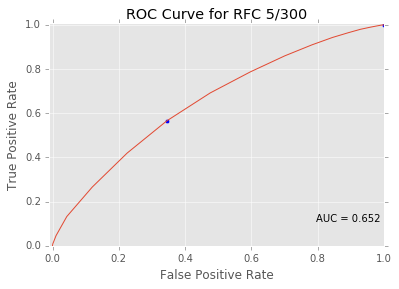

all   score: 0.848  baseline: 0.848   prec: nan   f1: 0.918  | test score 0.848  prec nan f1 0.000  GP -915MM
2011  score: 0.896  baseline: 0.896   prec: nan   f1: 0.945  | test score 0.893  prec nan
2012  score: 0.866  baseline: 0.866   prec: nan   f1: 0.928  | test score 0.865  prec nan
2013  score: 0.822  baseline: 0.822   prec: nan   f1: 0.902  | test score 0.824  prec nan


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=1729, verbose=0,
            warm_start=False)

In [76]:
eval_model_by_year(lambda: RFC(random_state=1729, max_depth=5, n_estimators=300), model_name='RFC 5/300')

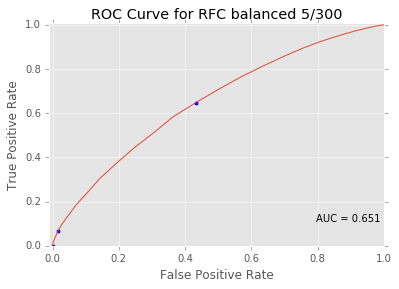

all   score: 0.641  baseline: 0.848   prec: 0.777   f1: 0.756  | test score 0.636  prec 0.776 f1 0.485  GP -69MM
2011  score: 0.751  baseline: 0.896   prec: 0.844   f1: 0.852  | test score 0.753  prec 0.823
2012  score: 0.639  baseline: 0.866   prec: 0.814   f1: 0.760  | test score 0.648  prec 0.813
2013  score: 0.654  baseline: 0.822   prec: 0.732   f1: 0.763  | test score 0.655  prec 0.734


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=5, max_features='auto',
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=1729, verbose=0,
            warm_start=False)

In [77]:
eval_model_by_year(lambda: RFC(random_state=1729, max_depth=5, class_weight = 'balanced', n_estimators=300),
                   model_name='RFC balanced 5/300')

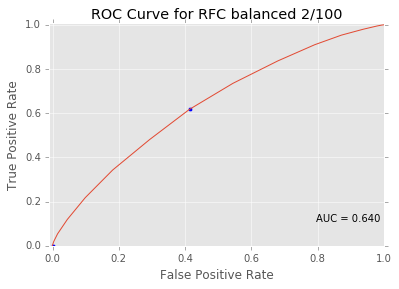

all   score: 0.610  baseline: 0.848   prec: 0.787   f1: 0.727  | test score 0.613  prec 0.785 f1 0.514  GP -19MM


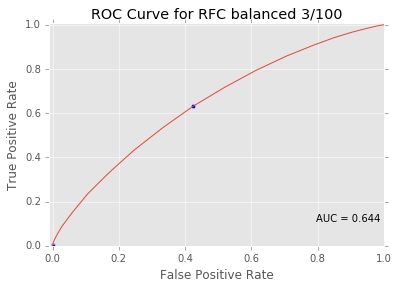

all   score: 0.623  baseline: 0.848   prec: 0.783   f1: 0.740  | test score 0.623  prec 0.782 f1 0.501  GP -44MM


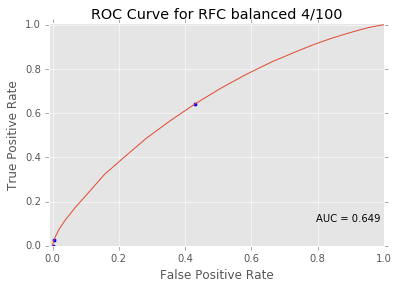

all   score: 0.627  baseline: 0.848   prec: 0.782   f1: 0.744  | test score 0.631  prec 0.778 f1 0.490  GP -89MM


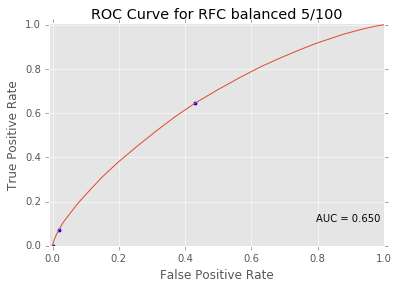

all   score: 0.639  baseline: 0.848   prec: 0.777   f1: 0.754  | test score 0.635  prec 0.777 f1 0.486  GP -72MM


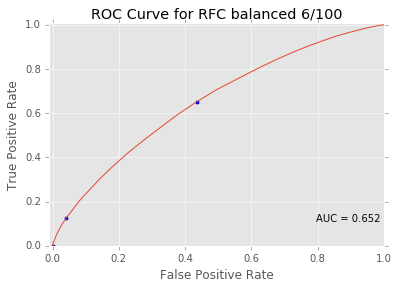

all   score: 0.647  baseline: 0.848   prec: 0.775   f1: 0.762  | test score 0.639  prec 0.775 f1 0.480  GP -98MM


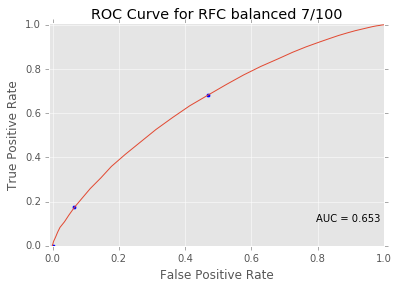

all   score: 0.662  baseline: 0.848   prec: 0.771   f1: 0.775  | test score 0.660  prec 0.770 f1 0.449  GP -172MM


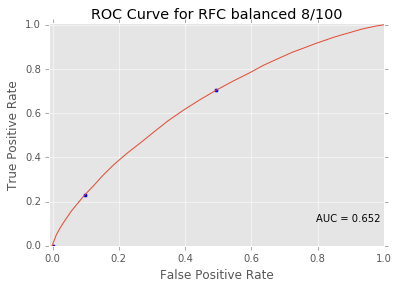

all   score: 0.677  baseline: 0.848   prec: 0.766   f1: 0.789  | test score 0.673  prec 0.766 f1 0.428  GP -207MM


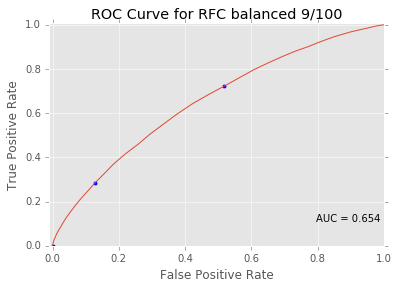

all   score: 0.699  baseline: 0.848   prec: 0.759   f1: 0.807  | test score 0.686  prec 0.763 f1 0.407  GP -259MM


In [78]:
for max_depth in range(2, 10):
    eval_model_all_years(lambda: RFC(random_state=1729, max_depth=max_depth, class_weight = 'balanced', n_estimators=100),
                         model_name='RFC balanced ' + str(max_depth) + '/100')  # TODO: other hyperparams

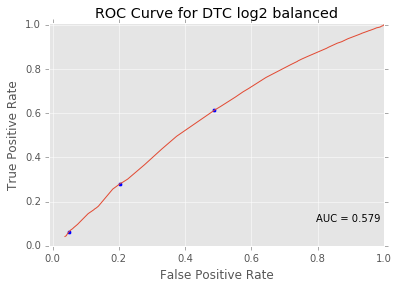

all   score: 0.545  baseline: 0.848   prec: 0.812   f1: 0.665  | test score 0.597  prec 0.809 f1 0.524  GP -43MM
2011  score: 0.558  baseline: 0.896   prec: 0.877   f1: 0.686  | test score 0.653  prec 0.864
2012  score: 0.547  baseline: 0.866   prec: 0.842   f1: 0.672  | test score 0.464  prec 0.855
2013  score: 0.589  baseline: 0.822   prec: 0.778   f1: 0.705  | test score 0.517  prec 0.788


DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=10, max_features='log2', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [79]:
eval_model_by_year(lambda: DTC(max_depth = 10, max_features = 'log2', class_weight = 'balanced', criterion = 'gini'),
                  model_name='DTC log2 balanced')

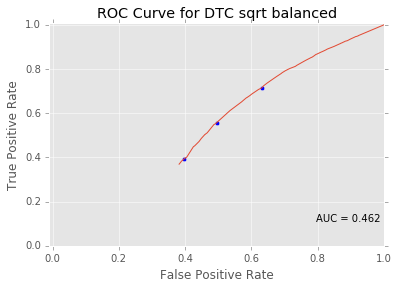

all   score: 0.647  baseline: 0.848   prec: 0.811   f1: 0.768  | test score 0.662  prec 0.812 f1 0.422  GP -296MM
2011  score: 0.745  baseline: 0.896   prec: 0.875   f1: 0.849  | test score 0.697  prec 0.877
2012  score: 0.676  baseline: 0.866   prec: 0.839   f1: 0.795  | test score 0.713  prec 0.836
2013  score: 0.618  baseline: 0.822   prec: 0.788   f1: 0.739  | test score 0.647  prec 0.775


DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
            max_depth=20, max_features='sqrt', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [80]:
eval_model_by_year(lambda: DTC(max_depth = 20, max_features = 'sqrt', class_weight = 'balanced', criterion = 'entropy'),
                  model_name='DTC sqrt balanced')

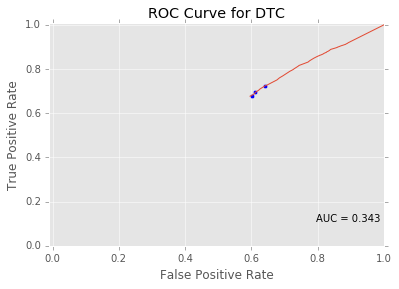

all   score: 0.686  baseline: 0.848   prec: 0.807   f1: 0.802  | test score 0.669  prec 0.811 f1 0.412  GP -337MM
2011  score: 0.790  baseline: 0.896   prec: 0.888   f1: 0.881  | test score 0.778  prec 0.857
2012  score: 0.676  baseline: 0.866   prec: 0.852   f1: 0.796  | test score 0.711  prec 0.844
2013  score: 0.668  baseline: 0.822   prec: 0.788   f1: 0.786  | test score 0.662  prec 0.787


DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
            max_depth=20, max_features=None, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [81]:
eval_model_by_year(lambda: DTC(max_depth = 20, max_features = None, class_weight = 'balanced', criterion = 'entropy'),
                  model_name='DTC')

In [82]:
# This takes a very long time for practically no uplift
#eval_model_all_years(lambda: SVC(class_weight='balanced', probability=True))

In [83]:
# This takes a very long time for practically no uplift
#eval_model_all_years(lambda: SVC(class_weight='balanced', probability=True), prob_threshold=0.85)

#### Other Models without PCA

In [84]:
# TODO: Try again, this time fitting a regression against the payments received

In [85]:
# Curious -- what are the 95 CI for the baselines?
for yr in set(years.values):
    yr_n = (years == yr).sum()
    yr_def = (y[years == yr]).sum()
    yr_p = (y[years == yr]).mean()
    yr_se = (yr_p * (1.0-yr_p) / yr_n)
    print "y=%4d   n=%4d   d=%4d   p: %.3f | %.3f | %.3f" % (yr, yr_n, yr_def, yr_p - 1.96*yr_se, yr_p, yr_p + 1.96*yr_se)

y=2011   n=3561   d=3190   p: 0.896 | 0.896 | 0.896
y=2012   n=10764   d=9318   p: 0.866 | 0.866 | 0.866
y=2013   n=13857   d=11389   p: 0.822 | 0.822 | 0.822


In [86]:
# Default rate for small business is higher, right?
print y.mean()
print y[x_expanded.loan_purpose__small_business == 1].mean()

0.847952593854
0.761029411765


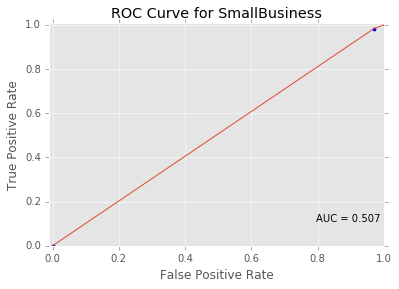

all   score: 0.838  baseline: 0.848   prec: 0.763   f1: 0.911  | test score 0.838  prec 0.761 f1 0.034  GP -869MM
2011  score: 0.872  baseline: 0.896   prec: 0.810   f1: 0.931  | test score 0.872  prec 0.797
2012  score: 0.853  baseline: 0.866   prec: 0.790   f1: 0.920  | test score 0.850  prec 0.794
2013  score: 0.817  baseline: 0.822   prec: 0.671   f1: 0.899  | test score 0.821  prec 0.662


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [87]:
eval_model_by_year(lambda: Log_Reg(class_weight='balanced'), ['loan_purpose__small_business'], model_name='SmallBusiness')

In [88]:
# LogReg is doing well.. what are the largest coefficients?
lr = Log_Reg(class_weight='balanced').fit(x_expanded[years.isin([2011,2012,2013])], y[years.isin([2011,2012,2013])])
lr_coeff = pd.DataFrame(lr.coef_.T, index=x_expanded.columns)
lr_coeff.columns = ['coeff']
lr_coeff['abs'] = lr_coeff.coeff.abs()

In [89]:
lr_coeff.sort_values('abs', ascending=False).coeff

emp_cleaned__policeofficer          1.503787
cpi                                -1.345924
gdp                                 1.137583
emp_cleaned__stateofcalifornia      0.995901
emp_cleaned__americanairlines      -0.925987
home_owner__RENT                   -0.902133
home_owner__OWN                    -0.792162
emp_cleaned__unitedairlines        -0.774237
emp_cleaned__salesmanager           0.764218
emp_cleaned__sales                 -0.714815
home_owner__MORTGAGE               -0.685728
emp_cleaned__usgovernment          -0.680668
loan_purpose__renewable_energy     -0.676308
emp_cleaned__unitedparcelservice   -0.672116
address_state__WY                   0.659704
emp_cleaned__departmentofdefense    0.653487
address_state__AK                   0.647839
emp_cleaned__homedepot             -0.619094
emp_cleaned__                      -0.599326
loan_purpose__small_business       -0.573709
emp_cleaned__hewlettpackard         0.567296
loan_purpose__credit_card           0.549169
emp_cleane

In [90]:
lr_probs = lr.predict_proba(x_expanded)[:,0]

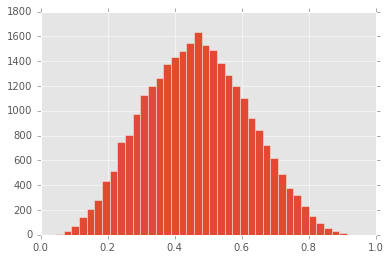

In [91]:
plt.hist(lr_probs ,bins=40)
plt.show()

In [92]:
1 - y.groupby([int(p*20)/20.0 for p in lr_probs]).mean()

0.00    0.000000
0.05    0.017857
0.10    0.024911
0.15    0.036161
0.20    0.045420
0.25    0.065406
0.30    0.073075
0.35    0.088712
0.40    0.129975
0.45    0.137460
0.50    0.169877
0.55    0.202147
0.60    0.243458
0.65    0.268048
0.70    0.289602
0.75    0.369600
0.80    0.429658
0.85    0.518072
0.90    0.000000
Name: loan_status, dtype: float64

In [93]:
# probs = eval_model_with_threshold(lambda: Log_Reg())

In [94]:
# probs = eval_model_with_threshold(lambda: Log_Reg(class_weight='balanced'))

In [95]:
# VERY SLOW
#probs = eval_model_with_threshold(lambda: SVC(
#        random_state=1729,
#        probability=True))

#### Models with PCA

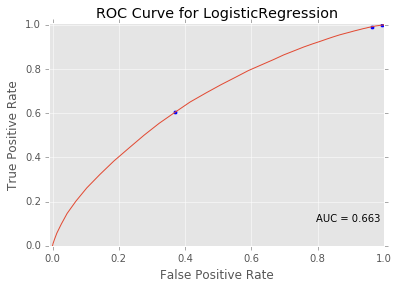

all   score: 0.848  baseline: 0.848   prec: 0.561   f1: 0.917  | test score 0.848  prec 0.508 f1 0.003  GP -910MM
2011  score: 0.893  baseline: 0.896   prec: nan   f1: 0.944  | test score 0.893  prec 0.700
2012  score: 0.866  baseline: 0.866   prec: nan   f1: 0.928  | test score 0.865  prec 0.700
2013  score: 0.821  baseline: 0.822   prec: 0.566   f1: 0.901  | test score 0.823  prec 0.530


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [96]:
eval_model_by_year(lambda: Log_Reg(), x = x_expanded_pca, x_test = x_test_expanded_pca)

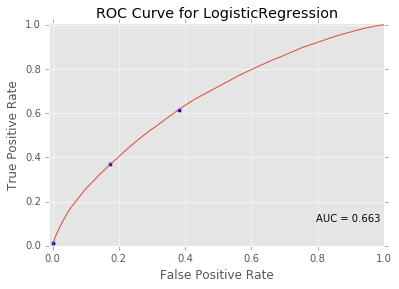

all   score: 0.621  baseline: 0.848   prec: 0.773   f1: 0.736  | test score 0.617  prec 0.776 f1 0.513  GP -30MM
2011  score: 0.631  baseline: 0.896   prec: 0.845   f1: 0.756  | test score 0.622  prec 0.846
2012  score: 0.605  baseline: 0.866   prec: 0.812   f1: 0.727  | test score 0.605  prec 0.817
2013  score: 0.630  baseline: 0.822   prec: 0.736   f1: 0.738  | test score 0.630  prec 0.739


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [97]:
eval_model_by_year(lambda: Log_Reg(class_weight='balanced'), x = x_expanded_pca, x_test = x_test_expanded_pca)

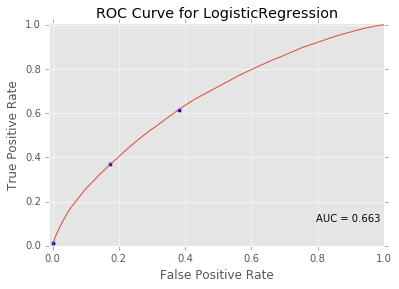

all   score: 0.621  baseline: 0.848   prec: 0.723   f1: 0.736  | test score 0.617  prec 0.732 f1 0.286  GP -473MM
2011  score: 0.631  baseline: 0.896   prec: 0.832   f1: 0.756  | test score 0.622  prec 0.817
2012  score: 0.605  baseline: 0.866   prec: 0.777   f1: 0.727  | test score 0.605  prec 0.790
2013  score: 0.630  baseline: 0.822   prec: 0.678   f1: 0.738  | test score 0.630  prec 0.692


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [98]:
eval_model_by_year(lambda: Log_Reg(class_weight='balanced'), prob_threshold=.6, 
                   x = x_expanded_pca, x_test = x_test_expanded_pca)

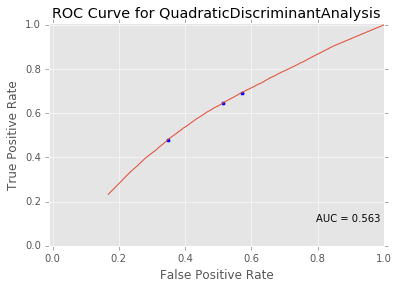

all   score: 0.657  baseline: 0.848   prec: 0.795   f1: 0.775  | test score 0.653  prec 0.800 f1 0.444  GP -245MM
2011  score: 0.605  baseline: 0.896   prec: 0.873   f1: 0.734  | test score 0.625  prec 0.873
2012  score: 0.670  baseline: 0.866   prec: 0.838   f1: 0.791  | test score 0.699  prec 0.839
2013  score: 0.660  baseline: 0.822   prec: 0.765   f1: 0.775  | test score 0.681  prec 0.766


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariances=False, tol=0.0001)

In [99]:
eval_model_by_year(lambda: QDA(), x = x_expanded_pca, x_test = x_test_expanded_pca)

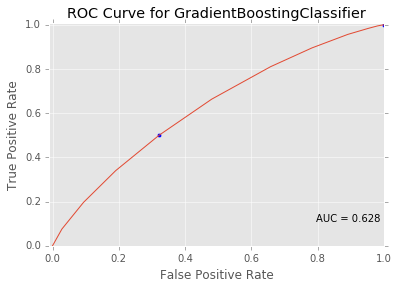

all   score: 0.848  baseline: 0.848   prec: nan   f1: 0.918  | test score 0.848  prec nan f1 0.000  GP -915MM
2011  score: 0.896  baseline: 0.896   prec: nan   f1: 0.945  | test score 0.893  prec nan
2012  score: 0.866  baseline: 0.866   prec: nan   f1: 0.928  | test score 0.865  prec nan
2013  score: 0.822  baseline: 0.822   prec: nan   f1: 0.902  | test score 0.824  prec nan


GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=2, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=10,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [100]:
eval_model_by_year(lambda: GBC(n_estimators = 10, max_depth = 2, learning_rate = 0.1),
                  x = x_expanded_pca, x_test = x_test_expanded_pca)

## NLP Modeling

#### Top Terms in Each Class

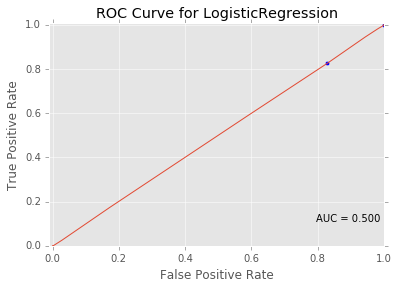

all   score: 0.860  baseline: 0.860   prec: nan   f1: 0.925  | test score 0.863  prec nan f1 0.000  GP -230MM
2011  score: 0.904  baseline: 0.904   prec: nan   f1: 0.949  | test score 0.893  prec nan
2012  score: 0.866  baseline: 0.866   prec: nan   f1: 0.928  | test score 0.867  prec nan
2013  score: 0.830  baseline: 0.830   prec: nan   f1: 0.907  | test score 0.837  prec nan


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [101]:
eval_model_by_year(lambda: Log_Reg(), x = count_cols_bool_train, x_test = count_cols_bool_test, 
                   y = y_nlp_train, y_test = y_nlp_test, years = years_nlp, years_test = years_nlp_test,
                  profit_data_test = x_nlp_test)

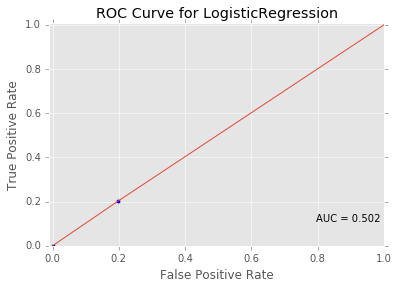

all   score: 0.296  baseline: 0.860   prec: 0.858   f1: 0.338  | test score 0.284  prec 0.862 f1 0.829  GP 198MM
2011  score: 0.628  baseline: 0.904   prec: 0.910   f1: 0.757  | test score 0.557  prec 0.875
2012  score: 0.294  baseline: 0.866   prec: 0.865   f1: 0.334  | test score 0.186  prec 0.868
2013  score: 0.511  baseline: 0.830   prec: 0.830   f1: 0.629  | test score 0.545  prec 0.838


LogisticRegression(C=1e-06, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [102]:
eval_model_by_year(lambda: Log_Reg(C = 10 ** -6, class_weight = 'balanced'), 
                   x = count_cols_bool_train, x_test = count_cols_bool_test, 
                   y = y_nlp_train, y_test = y_nlp_test, years = years_nlp, years_test = years_nlp_test,
                  profit_data_test = x_nlp_test)

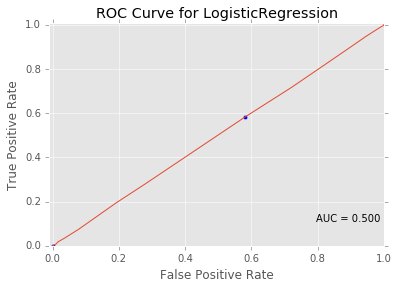

all   score: 0.565  baseline: 0.860   prec: 0.914   f1: 0.699  | test score 0.561  prec 0.826 f1 0.002  GP -230MM
2011  score: 0.478  baseline: 0.904   prec: 0.884   f1: 0.620  | test score 0.517  prec 0.921
2012  score: 0.578  baseline: 0.866   prec: 0.820   f1: 0.712  | test score 0.551  prec 0.914
2013  score: 0.527  baseline: 0.830   prec: 0.866   f1: 0.654  | test score 0.524  prec 0.759


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [103]:
eval_model_by_year(lambda: Log_Reg(class_weight = 'balanced'), prob_threshold = 0.6,
                   x = count_cols_bool_train, x_test = count_cols_bool_test, 
                   y = y_nlp_train, y_test = y_nlp_test, years = years_nlp, years_test = years_nlp_test,
                  profit_data_test = x_nlp_test)

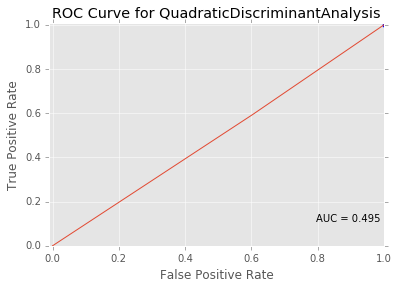

all   score: 0.860  baseline: 0.860   prec: nan   f1: 0.925  | test score 0.863  prec nan f1 0.000  GP -230MM
2011  score: 0.904  baseline: 0.904   prec: nan   f1: 0.949  | test score 0.893  prec nan
2012  score: 0.866  baseline: 0.866   prec: nan   f1: 0.928  | test score 0.867  prec nan
2013  score: 0.830  baseline: 0.830   prec: nan   f1: 0.907  | test score 0.837  prec nan


QuadraticDiscriminantAnalysis(priors=None, reg_param=1,
               store_covariances=False, tol=0.0001)

In [104]:
eval_model_by_year(lambda: QDA(reg_param = 1), x = count_cols_bool_train, x_test = count_cols_bool_test, 
                   y = y_nlp_train, y_test = y_nlp_test, years = years_nlp, years_test = years_nlp_test,
                  profit_data_test = x_nlp_test)

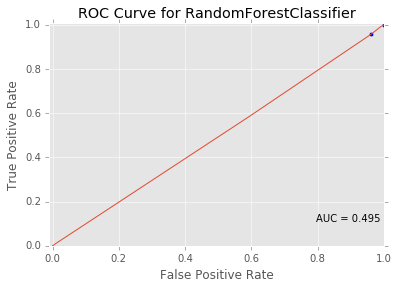

all   score: 0.860  baseline: 0.860   prec: nan   f1: 0.925  | test score 0.863  prec nan f1 0.000  GP -230MM
2011  score: 0.904  baseline: 0.904   prec: nan   f1: 0.949  | test score 0.893  prec nan
2012  score: 0.866  baseline: 0.866   prec: nan   f1: 0.928  | test score 0.867  prec nan
2013  score: 0.830  baseline: 0.830   prec: nan   f1: 0.907  | test score 0.837  prec nan


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=1729, verbose=0,
            warm_start=False)

In [105]:
eval_model_by_year(lambda: RFC(random_state=1729, max_depth=5, n_estimators=300),
                    x = count_cols_bool_train, x_test = count_cols_bool_test, 
                   y = y_nlp_train, y_test = y_nlp_test, years = years_nlp, years_test = years_nlp_test,
                  profit_data_test = x_nlp_test)

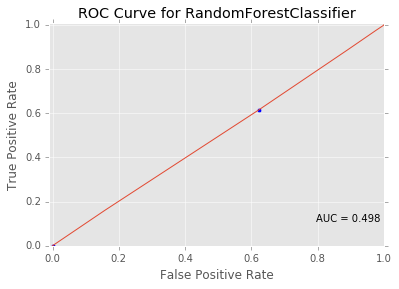

all   score: 0.582  baseline: 0.860   prec: 0.860   f1: 0.716  | test score 0.582  prec 0.865 f1 0.533  GP -24MM
2011  score: 0.555  baseline: 0.904   prec: 0.903   f1: 0.696  | test score 0.597  prec 0.885
2012  score: 0.632  baseline: 0.866   prec: 0.864   f1: 0.761  | test score 0.602  prec 0.872
2013  score: 0.534  baseline: 0.830   prec: 0.830   f1: 0.661  | test score 0.558  prec 0.838


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=5, max_features='auto',
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=1729, verbose=0,
            warm_start=False)

In [106]:
eval_model_by_year(lambda: RFC(random_state=1729, max_depth=5, n_estimators=300, class_weight = 'balanced'),
                    x = count_cols_bool_train, x_test = count_cols_bool_test, 
                   y = y_nlp_train, y_test = y_nlp_test, years = years_nlp, years_test = years_nlp_test,
                  profit_data_test = x_nlp_test)

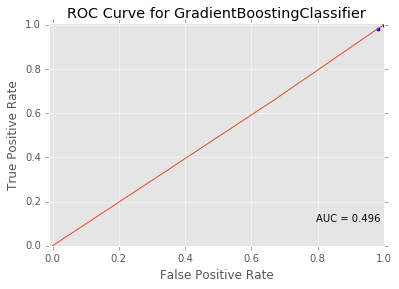

all   score: 0.860  baseline: 0.860   prec: nan   f1: 0.925  | test score 0.863  prec nan f1 0.000  GP -230MM
2011  score: 0.904  baseline: 0.904   prec: nan   f1: 0.949  | test score 0.893  prec nan
2012  score: 0.866  baseline: 0.866   prec: nan   f1: 0.928  | test score 0.867  prec nan
2013  score: 0.830  baseline: 0.830   prec: nan   f1: 0.907  | test score 0.837  prec nan


GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=2, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=10,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [107]:
eval_model_by_year(lambda: GBC(n_estimators = 10, max_depth = 2, learning_rate = 0.1),
                    x = count_cols_bool_train, x_test = count_cols_bool_test, 
                   y = y_nlp_train, y_test = y_nlp_test, years = years_nlp, years_test = years_nlp_test,
                  profit_data_test = x_nlp_test)

#### Full Document-Term Matrix (Reduced with PCA)

C:\Users\agreene\AppData\Local\Continuum\Anaconda2\envs\amg1\lib\site-packages\pandas\core\internals.py:227: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 84854 but corresponding boolean dimension is 21485
  return self.values[slicer]
C:\Users\agreene\AppData\Local\Continuum\Anaconda2\envs\amg1\lib\site-packages\pandas\indexes\base.py:1275: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 84854 but corresponding boolean dimension is 21485
  result = getitem(key)


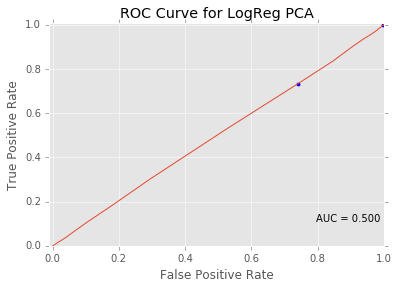

all   score: 0.860  baseline: 0.860   prec: 0.793   f1: 0.924  | test score 0.862  prec 0.857 f1 0.001  GP -236MM
2011  score: 0.900  baseline: 0.904   prec: 0.921   f1: 0.947  | test score 0.891  prec 0.875
2012  score: 0.864  baseline: 0.866   prec: 0.749   f1: 0.927  | test score 0.864  prec 0.824
2013  score: 0.830  baseline: 0.830   prec: 0.960   f1: 0.907  | test score 0.836  prec 0.750


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [108]:
eval_model_by_year(lambda: Log_Reg(), x = desc_matrix_pca, x_test = desc_matrix_test_pca, 
                   y = y_nlp_train, y_test = y_nlp_test, years = years_nlp, years_test = years_nlp_test,
                   model_name='LogReg PCA')

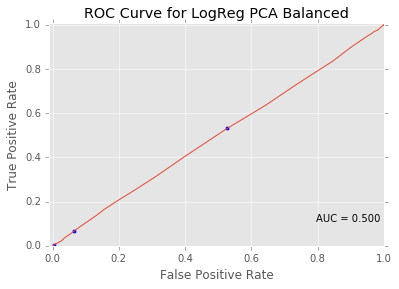

all   score: 0.524  baseline: 0.860   prec: 0.858   f1: 0.658  | test score 0.524  prec 0.861 f1 0.607  GP 20MM
2011  score: 0.590  baseline: 0.904   prec: 0.905   f1: 0.729  | test score 0.593  prec 0.910
2012  score: 0.522  baseline: 0.866   prec: 0.870   f1: 0.658  | test score 0.533  prec 0.864
2013  score: 0.530  baseline: 0.830   prec: 0.833   f1: 0.659  | test score 0.530  prec 0.840


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [109]:
eval_model_by_year(lambda: Log_Reg(class_weight = 'balanced'), x = desc_matrix_pca, x_test = desc_matrix_test_pca, 
                   y = y_nlp_train, y_test = y_nlp_test, years = years_nlp, years_test = years_nlp_test,
                   model_name='LogReg PCA Balanced')

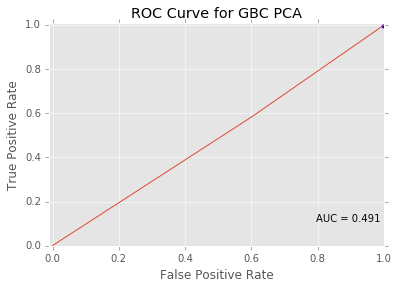

all   score: 0.860  baseline: 0.860   prec: nan   f1: 0.925  | test score 0.863  prec nan f1 0.000  GP -237MM
2011  score: 0.903  baseline: 0.904   prec: nan   f1: 0.949  | test score 0.893  prec nan
2012  score: 0.866  baseline: 0.866   prec: nan   f1: 0.928  | test score 0.867  prec nan
2013  score: 0.830  baseline: 0.830   prec: nan   f1: 0.907  | test score 0.837  prec nan


GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=2, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=10,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [110]:
eval_model_by_year(lambda: GBC(n_estimators = 10, max_depth = 2, learning_rate = 0.1),
                   x = desc_matrix_pca, x_test = desc_matrix_test_pca,
                   y = y_nlp_train, y_test = y_nlp_test, years = years_nlp, years_test = years_nlp_test,
                   model_name='GBC PCA')

## Stacking

In [111]:
class Stacking(object):
    
    def __init__(self, unfitted_combiner, component_type = 'mixed'):
        self.combiner = unfitted_combiner
        self.model_stack = None   
        
        stack = []
        
        # logistic regression component models with various class weights
        if component_type == 'log_reg':
            for diff in np.arange(0, 5, 0.5):
                weight_dict = { 0 : 1, 1 : (1 + diff) }
                stack.append([Log_Reg(C = 1, class_weight = weight_dict), 'Log_Reg ' + str(1 + diff)])
                
        # default - mixed component models
        else:
            stack.append((Log_Reg(C = 10 ** -5), 'Log_Reg'))
            stack.append((Log_Reg(C = 10 ** -5, class_weight = 'balanced'), 'Log_Reg balanced'))
            stack.append((LDA(shrinkage = 1, solver = 'eigen'), 'LDA'))
            stack.append((QDA(reg_param = 1), 'QDA'))
            stack.append((RFC(random_state=1729, n_estimators = 10, max_depth = 4), 'RF'))
            stack.append((RFC(random_state=1729, n_estimators = 300, max_depth = 5, class_weight = 'balanced'),
                        'RF balanced'))
            stack.append((GBC(n_estimators = 10, max_depth = 2, learning_rate = 0.1), 'Boost'))
            stack.append((DTC(max_depth = 10, max_features = 'log2', criterion = 'gini'), 'Tree 1'))
            stack.append((DTC(max_depth = 20, max_features = 'sqrt', criterion = 'entropy'), 'Tree 2'))
            stack.append((DTC(max_depth = 20, max_features = None, criterion = 'entropy'), 'Tree 3'))
            stack.append((DTC(max_depth = 30, max_features = None, criterion = 'gini'), 'Tree 4'))      
            #stack.append(SVC(class_weight = 'balanced')) # slow
                         
        self.model_stack = pd.DataFrame(stack, columns = ['Model_Params', 'Model'])
        self.num_models = len(self.model_stack)
    
    def _predict_component_models(self, X):
        n = X.shape[0]
        y_hat_stack = np.zeros((n, self.num_models))
        for index in range(self.num_models):
            y_hat_stack[:, index] = self.model_stack.iloc[index, 0].predict(X)
        return y_hat_stack
        
    def fit(self, X, y):
        for index in range(self.num_models):
            self.model_stack.iloc[index, 0].fit(X, y)
        y_hat_stack = self._predict_component_models(X)
        self.combiner = self.combiner.fit(y_hat_stack, y)
        return self
        
    def score(self, X, y):
        y_hat_stack = self._predict_component_models(X)
        score = self.combiner.score(y_hat_stack, y)
        return score
              
    def predict(self, X):
        y_hat_stack = self._predict_component_models(X)
        y_hat = self.combiner.predict(y_hat_stack)
        return y_hat
    
    def predict_proba(self, X):
        y_hat_stack = self._predict_component_models(X)
        y_hat_proba = self.combiner.predict_proba(y_hat_stack)
        return y_hat_proba
    
    def confusion_matrix(self, y, y_hat):
        return confusion_matrix(y, y_hat)
     
    def f1_score(self, y, y_hat):
        return f1_score(y, y_hat, pos_label = 1)
    
    def get_features(self):
        long_name = str(type(self.combiner))
        short_name = re.sub('.*\.', '', long_name)
        short_name = re.sub('\'>', '', short_name)
        
        index = index = self.model_stack.iloc[:, 1]
        if short_name == 'LogisticRegression':
            return pd.DataFrame(self.combiner.coef_.T, index = index)
        else:
            return pd.DataFrame(self.combiner.feature_importances_.T, index = index)

In [112]:
def print_stacking_features(x_train, y_train, x_test, y_test, combiner, component_type = 'mixed'):
    model = Stacking(combiner, component_type)
    model.fit(x_train, y_train)
    
    features = model.get_features()
    features.columns = ['Importance']
    features['Abs'] = np.abs(features.Importance)
    features = features.sort_values('Abs', ascending = False).drop('Abs', axis = 1)
    display(features)

#### Regular Data

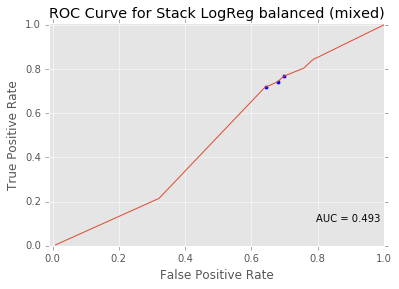

all   score: 0.689  baseline: 0.848   prec: 0.809   f1: 0.805  | test score 0.697  prec 0.811 f1 0.362  GP -381MM
2011  score: 0.826  baseline: 0.896   prec: 0.860   f1: 0.903  | test score 0.809  prec 0.864
2012  score: 0.725  baseline: 0.866   prec: 0.833   f1: 0.834  | test score 0.703  prec 0.841
2013  score: 0.663  baseline: 0.822   prec: 0.791   f1: 0.782  | test score 0.664  prec 0.783


In [113]:
combiner = Log_Reg(C = 1, class_weight = 'balanced', penalty = 'l2', solver = 'liblinear')
eval_model_by_year(lambda: Stacking(combiner), model_name = "Stack LogReg balanced (mixed)")

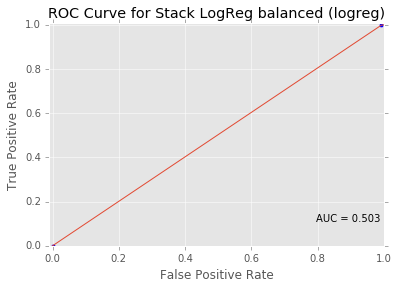

all   score: 0.847  baseline: 0.848   prec: 0.575   f1: 0.917  | test score 0.848  prec 0.538 f1 0.003  GP -910MM
2011  score: 0.894  baseline: 0.896   prec: 0.567   f1: 0.944  | test score 0.893  prec 0.727
2012  score: 0.866  baseline: 0.866   prec: 0.367   f1: 0.928  | test score 0.865  prec 0.750
2013  score: 0.821  baseline: 0.822   prec: 0.536   f1: 0.901  | test score 0.823  prec 0.541


In [114]:
combiner = Log_Reg(C = 1, class_weight = 'balanced', penalty = 'l2', solver = 'liblinear')
eval_model_by_year(lambda: Stacking(combiner, 'log_reg'), model_name = "Stack LogReg balanced (logreg)")

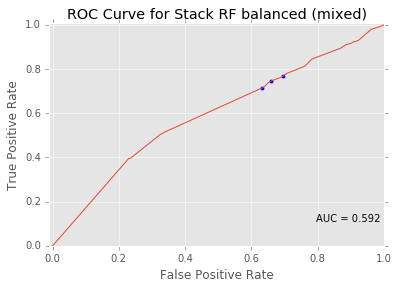

all   score: 0.687  baseline: 0.848   prec: 0.807   f1: 0.803  | test score 0.697  prec 0.810 f1 0.362  GP -375MM
2011  score: 0.791  baseline: 0.896   prec: 0.875   f1: 0.881  | test score 0.736  prec 0.869
2012  score: 0.703  baseline: 0.866   prec: 0.827   f1: 0.816  | test score 0.699  prec 0.844
2013  score: 0.660  baseline: 0.822   prec: 0.786   f1: 0.778  | test score 0.662  prec 0.795


In [115]:
combiner = RFC(random_state=1729, n_estimators = 10, max_depth = 4, max_features = 'sqrt', 
               criterion = 'gini', class_weight = 'balanced')
eval_model_by_year(lambda: Stacking(combiner), model_name = "Stack RF balanced (mixed)")

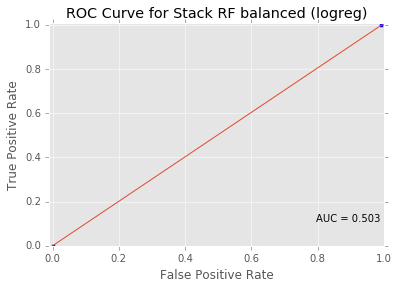

all   score: 0.847  baseline: 0.848   prec: 0.580   f1: 0.917  | test score 0.848  prec 0.538 f1 0.003  GP -910MM
2011  score: 0.585  baseline: 0.896   prec: 0.722   f1: 0.569  | test score 0.893  prec 0.727
2012  score: 0.578  baseline: 0.866   prec: nan   f1: 0.558  | test score 0.135  prec 0.865
2013  score: 0.820  baseline: 0.822   prec: 0.563   f1: 0.901  | test score 0.823  prec 0.530


In [116]:
combiner = RFC(random_state=1729, n_estimators = 10, max_depth = 4, max_features = 'sqrt', 
               criterion = 'gini', class_weight = 'balanced')
eval_model_by_year(lambda: Stacking(combiner, 'log_reg'), model_name = "Stack RF balanced (logreg)")

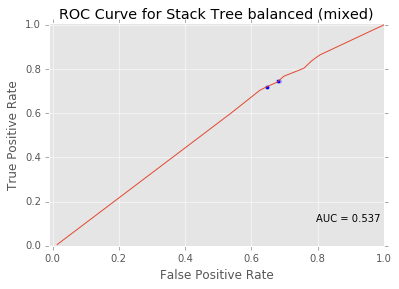

all   score: 0.680  baseline: 0.848   prec: 0.813   f1: 0.798  | test score 0.682  prec 0.817 f1 0.386  GP -345MM
2011  score: 0.797  baseline: 0.896   prec: 0.866   f1: 0.885  | test score 0.751  prec 0.872
2012  score: 0.719  baseline: 0.866   prec: 0.838   f1: 0.829  | test score 0.694  prec 0.843
2013  score: 0.663  baseline: 0.822   prec: 0.790   f1: 0.782  | test score 0.674  prec 0.783


In [117]:
combiner = DTC(max_depth = 10, max_features = 'log2', class_weight = 'balanced', 
                           criterion = 'gini')
eval_model_by_year(lambda: Stacking(combiner), model_name = "Stack Tree balanced (mixed)")

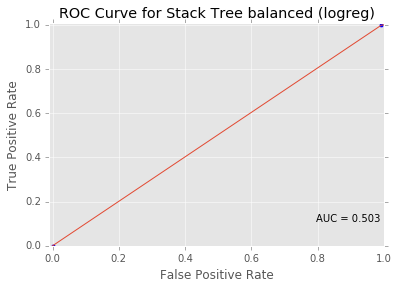

all   score: 0.847  baseline: 0.848   prec: 0.580   f1: 0.917  | test score 0.848  prec 0.538 f1 0.003  GP -910MM
2011  score: 0.894  baseline: 0.896   prec: 0.567   f1: 0.944  | test score 0.893  prec 0.727
2012  score: 0.866  baseline: 0.866   prec: 0.367   f1: 0.928  | test score 0.865  prec 0.750
2013  score: 0.821  baseline: 0.822   prec: 0.536   f1: 0.901  | test score 0.823  prec 0.541


In [118]:
combiner = DTC(max_depth = 10, max_features = 'log2', class_weight = 'balanced', 
                           criterion = 'gini')
eval_model_by_year(lambda: Stacking(combiner, 'log_reg'), model_name = "Stack Tree balanced (logreg)")

#### Stacking Feature Importances

In [119]:
combiner = Log_Reg(C = 1, class_weight = 'balanced', penalty = 'l2', solver = 'liblinear')
print_stacking_features(x_expanded, y, x_test_expanded, y_test, combiner, 'mixed')

,Importance
Model,
Tree 4,8.580963
Tree 3,5.274198
Tree 2,3.914631
Log_Reg,-2.976770
RF,-2.976770
Boost,-2.976770
LDA,-1.402906
QDA,-1.402906
Tree 1,1.012894


In [120]:
combiner = RFC(random_state=1729, n_estimators = 10, max_depth = 4, max_features = 'sqrt', 
               criterion = 'gini', class_weight = 'balanced')
print_stacking_features(x_expanded, y, x_test_expanded, y_test, combiner, 'mixed')

,Importance
Model,
Tree 4,0.493048
Tree 3,0.327264
Tree 2,0.150791
RF balanced,0.019093
Log_Reg balanced,0.005716
Tree 1,0.003844
QDA,0.000135
LDA,0.000110
Log_Reg,0.000000


In [121]:
combiner = DTC(max_depth = 10, max_features = 'log2', class_weight = 'balanced', 
                           criterion = 'gini')
print_stacking_features(x_expanded, y, x_test_expanded, y_test, combiner, 'mixed')

,Importance
Model,
Tree 4,0.411652
Tree 2,0.348385
Tree 3,0.187848
RF balanced,0.047227
Tree 1,0.004110
Log_Reg balanced,0.000665
QDA,0.000107
LDA,0.000006
Log_Reg,0.000000


## Visualizations

In [136]:
pd.DataFrame(model_performance).T.sort_values('test_prec', ascending=False)

,auc,baseline,f1,prec,score,test_f1,test_prec,test_profit,test_score
LogReg PCA Balanced,0.500083,0.860074,0.657955,0.858047,0.524233,0.606677,0.861497,20.412340,0.523668
LogReg PCA,0.500228,0.860074,0.924484,0.793333,0.859595,0.001294,0.857143,-236.575713,0.862136
Always 1,0.500000,0.847953,0.000000,0.847953,0.152047,0.917955,0.848351,1221.642931,0.151649
LogReg balanced state x^2,0.552273,0.847953,0.643839,0.833249,0.518274,0.616788,0.829546,108.505368,0.517477
LogReg balanced basic x^2,0.559861,0.847953,0.645966,0.825481,0.522852,0.620626,0.825469,98.592633,0.515709
LogReg balanced employ x^2,0.559861,0.847953,0.645966,0.825481,0.522852,0.620626,0.825469,98.592633,0.515709
LogReg balanced basic x^3,0.560509,0.847953,0.656955,0.824396,0.532822,0.600254,0.824061,71.652887,0.533387
Stack Tree balanced (mixed),0.536611,0.847953,0.797563,0.813045,0.680292,0.386021,0.816819,-345.259422,0.682030
DTC sqrt balanced,0.461951,0.847953,0.767927,0.810888,0.646583,0.422151,0.812290,-296.214497,0.662326
Stack LogReg balanced (mixed),0.492564,0.847953,0.804535,0.809244,0.689057,0.361666,0.811492,-381.138838,0.696809


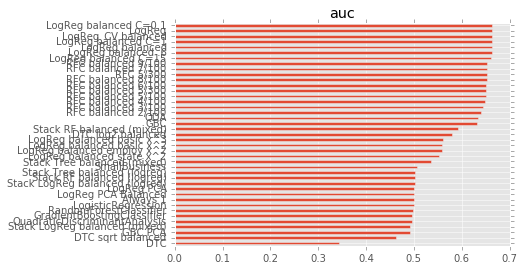

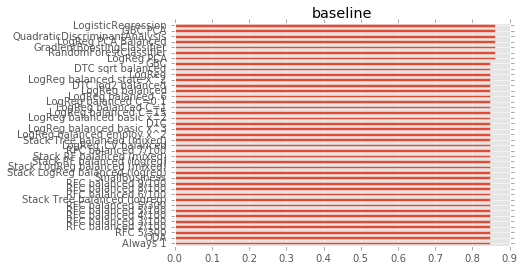

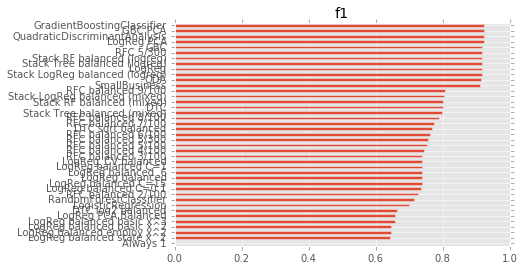

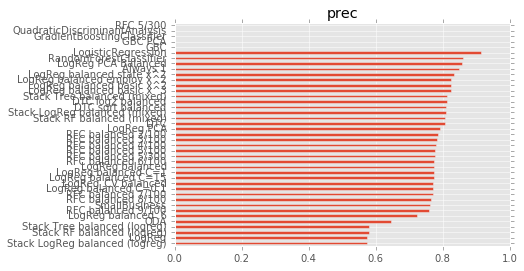

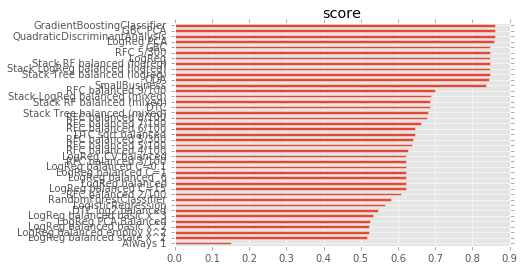

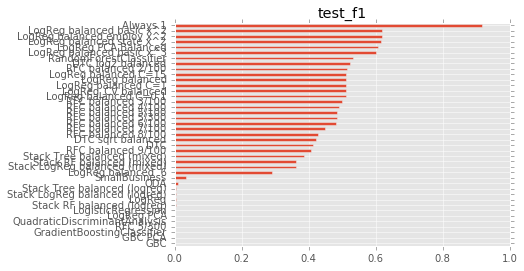

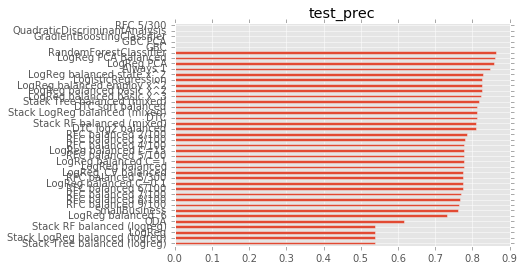

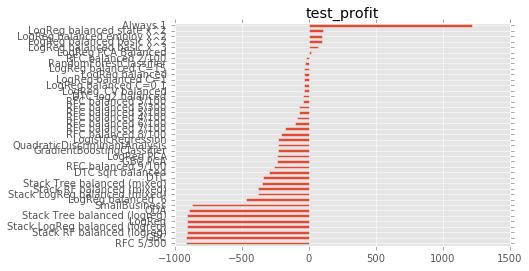

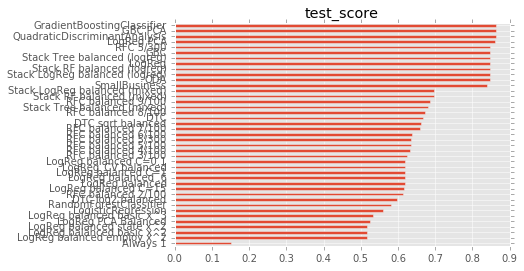

In [123]:
model_performance_df = pd.DataFrame(model_performance).T
for col in model_performance_df.columns:
    model_performance_df[col].sort_values().plot(kind='barh')
    plt.title(col)
    plt.show()

### Profit

In [124]:
# calculate profits
revenues = profit_data_train.total_rec_int + profit_data_train.total_rec_prncp + \
        profit_data_train.total_rec_late_fee + profit_data_train.recoveries
costs = profit_data_train.loan_amount
profit_data_train.actual_profit = revenues - costs

(array([  4.00000000e+00,   4.00000000e+01,   5.70000000e+01,
          7.30000000e+01,   9.80000000e+01,   9.70000000e+01,
          1.18000000e+02,   1.18000000e+02,   1.26000000e+02,
          1.52000000e+02,   1.69000000e+02,   1.72000000e+02,
          1.64000000e+02,   1.81000000e+02,   1.72000000e+02,
          1.74000000e+02,   1.41000000e+02,   1.63000000e+02,
          2.22000000e+02,   1.78000000e+02,   1.69000000e+02,
          1.90000000e+02,   1.83000000e+02,   1.61000000e+02,
          1.50000000e+02,   1.32000000e+02,   1.07000000e+02,
          9.10000000e+01,   7.70000000e+01,   9.50000000e+01,
          6.30000000e+01,   6.50000000e+01,   6.20000000e+01,
          2.80000000e+01,   3.70000000e+01,   1.70000000e+01,
          2.00000000e+01,   1.10000000e+01,   2.39040000e+04,
          1.00000000e+00]),
 array([ 0.        ,  0.02612489,  0.05224978,  0.07837468,  0.10449957,
         0.13062446,  0.15674935,  0.18287425,  0.20899914,  0.23512403,
         0.26124892,

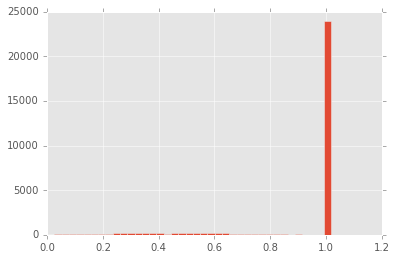

In [125]:
profit_ratio = np.where(y, 1.0, revenues / (profit_data_train.installment * 36))
plt.hist(profit_ratio, bins=40)

In [126]:
from sklearn.linear_model import RidgeCV
np.random.seed(1729)
train_flags_ridge = np.random.random(len(x_expanded)) < 0.7

ridge_profit = RidgeCV().fit(x_expanded.iloc[train_flags_ridge, :], profit_ratio[train_flags_ridge])
print "Alpha:", ridge_profit.alpha_
print "Train R^2:", ridge_profit.score(x_expanded.iloc[train_flags_ridge, :], profit_ratio[train_flags_ridge])
print "Test R^2:", ridge_profit.score(x_expanded.iloc[~train_flags_ridge, :], profit_ratio[~train_flags_ridge])

Alpha: 10.0
Train R^2: 0.0582768849114
Test R^2: 0.0450358590019


In [127]:
# print summary revenue and cost
print "REVENUES"
print "Total interested received =", profit_data.total_rec_int.sum() / float(10 ** 6)
print "Total principal received =", profit_data.total_rec_prncp.sum() / float(10 ** 6)
print "Total late fees received =", profit_data.total_rec_late_fee.sum() / float(10 ** 6)
print "Recoveries =", profit_data.recoveries.sum() / float(10 ** 6)
print
print "COSTS"
print "Total loan amounts =", profit_data.loan_amount.sum() / float(10 ** 6)

REVENUES
Total interested received = 204.88315865
Total principal received = 1216.20363347
Total late fees received = 0.0743948083222
Recoveries = 11.84101203

COSTS
Total loan amounts = 1342.7455


In [128]:
### fit and score for profits

predictors = x_expanded_pca
response = profit_data_train.actual_profit > 0

np.random.seed(1729)
train_flags = np.random.random(predictors.shape[0]) < 0.7
local_x_train = predictors.iloc[train_flags, :]
local_y_train = response[train_flags]
local_x_test = predictors.iloc[~train_flags, :]
local_y_test = response[~train_flags]

model = Lin_Reg().fit(local_x_train, local_y_train)
local_test_score = model.score(local_x_test, local_y_test)
print "R-squared on local test set =", local_test_score

R-squared on local test set = 0.0423310633351


In [129]:
### fit and score for classification

predictors = x_expanded_pca
response = profit_data_train.actual_profit > 0

np.random.seed(1729)
train_flags = np.random.random(predictors.shape[0]) < 0.7
local_x_train = predictors.iloc[train_flags, :]
local_y_train = response[train_flags]
local_x_test = predictors.iloc[~train_flags, :]
local_y_test = response[~train_flags]

model = Log_Reg(class_weight = 'balanced').fit(local_x_train, local_y_train)
local_test_score = model.score(local_x_test, local_y_test)
print "Accuracy on local test set =", local_test_score
local_test_y_hat = model.predict(local_x_test)
local_test_precision = local_y_test[local_test_y_hat].mean()
print "Precision on local test set =", local_test_precision

Accuracy on local test set = 0.632819040785
Precision on local test set = 0.911653008195


In [130]:
### fit and predict for classification

model2 = Log_Reg(class_weight = 'balanced').fit(x_expanded_pca, y)
y_predict_train = pd.DataFrame(model2.predict(x_expanded_pca))
y_predict_test = pd.DataFrame(model2.predict(x_test_expanded_pca))

y_predict_train.index = x_expanded_pca.index
y_predict_test.index = x_test_expanded_pca.index

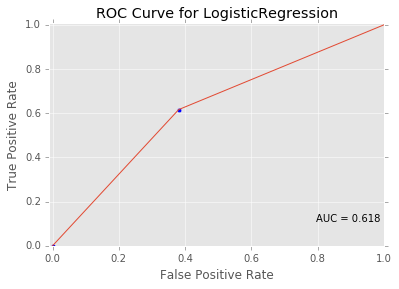

all   score: 0.625  baseline: 0.848   prec: 0.768   f1: 0.738  | test score 0.617  prec 0.776 f1 0.513  GP -30MM
2011  score: 0.786  baseline: 0.896   prec: 0.801   f1: 0.875  | test score 0.775  prec 0.804
2012  score: 0.654  baseline: 0.866   prec: 0.796   f1: 0.771  | test score 0.651  prec 0.801
2013  score: 0.562  baseline: 0.822   prec: 0.750   f1: 0.663  | test score 0.550  prec 0.760


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [131]:
eval_model_by_year(lambda: Log_Reg(class_weight = 'balanced'), x = y_predict_train, x_test = y_predict_test)

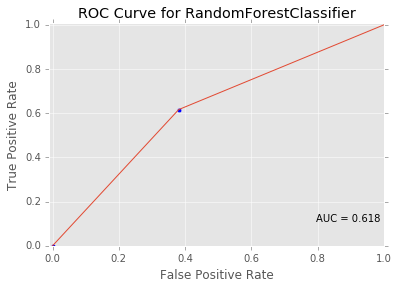

all   score: 0.625  baseline: 0.848   prec: 0.768   f1: 0.738  | test score 0.617  prec 0.776 f1 0.513  GP -30MM
2011  score: 0.786  baseline: 0.896   prec: 0.801   f1: 0.875  | test score 0.775  prec 0.804
2012  score: 0.654  baseline: 0.866   prec: 0.796   f1: 0.771  | test score 0.651  prec 0.801
2013  score: 0.562  baseline: 0.822   prec: 0.750   f1: 0.663  | test score 0.550  prec 0.760


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [132]:
eval_model_by_year(lambda: RFC(class_weight = 'balanced'), x = y_predict_train, x_test = y_predict_test)